# Online Retail II - Regresyon Analizi

Bu notebook, **Online Retail II** veri seti üzerinde kapsamlı bir **regresyon analizi** gerçekleştirmektedir. Analiz, çeşitli özellikler kullanarak satış miktarını (Quantity) tahmin etmeyi amaçlamaktadır.

**Veri Kaynağı:** [UCI Machine Learning Repository - Online Retail II](https://archive.ics.uci.edu/dataset/502/online+retail+ii)

---

## 📋 Proje Özeti

### Amaç
E-ticaret işlem kayıtlarından çeşitli özellikleri kullanarak **satış miktarını (Quantity)** tahmin etmek.

### Hedef Değişken
- **Quantity**: Satılan ürün miktarı (Regresyon problemi)

### Analiz Yöntemleri
Bu notebook'ta aşağıdaki regresyon algoritmaları uygulanacaktır:
1. **Linear Regression**
2. **Ridge Regression**
3. **Lasso Regression**
4. **Random Forest Regressor**
5. **XGBoost Regressor**
6. **Model Karşılaştırması ve Değerlendirme**

---

## 📊 Veri Seti Hakkında

### Genel Bilgiler
- **Veri Tipi**: E-ticaret işlem kayıtları
- **Tarih Aralığı**: 01/12/2009 - 09/12/2011
- **Şirket**: İngiliz online perakende şirketi (hediyelik eşya)

### Orijinal Sütunlar
| Sütun Adı | Açıklama |
|-----------|----------|
| Invoice | Fatura numarası |
| StockCode | Ürün kodu |
| Description | Ürün açıklaması |
| Quantity | Satılan miktar (hedef değişken) |
| InvoiceDate | Fatura tarihi ve saati |
| Price | Birim fiyat (Sterlin) |
| Customer ID | Müşteri numarası |
| Country | Müşterinin ülkesi |

---

## 🔄 Analiz Adımları

1. **Veri Yükleme ve Keşifsel Veri Analizi (EDA)**
2. **Veri Temizliği ve Ön İşleme**
3. **Özellik Mühendisliği**
4. **Veri Görselleştirme**
5. **Model Eğitimi ve Değerlendirme**
6. **Model Karşılaştırması**
7. **En İyi Modelin Seçimi ve Kaydedilmesi**


## 📦 1. Kütüphanelerin İçe Aktarılması


In [1]:
# Veri işleme
import pandas as pd
import numpy as np
from pathlib import Path

# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

# Makine öğrenmesi
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
try:
    import lightgbm as lgb
    LIGHTGBM_AVAILABLE = True
except ImportError:
    LIGHTGBM_AVAILABLE = False
    print("⚠️ LightGBM yüklü değil, LightGBM modelleri atlanacak")

import warnings

# Görselleştirme ayarları
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
warnings.filterwarnings('ignore')

print("✅ Kütüphaneler başarıyla yüklendi!")


✅ Kütüphaneler başarıyla yüklendi!


## 📥 2. Veri Yükleme


In [2]:
# Veri dosyasının yolu
# Notebook zaten regression-2 klasöründe olduğu için direkt data klasörüne gidiyoruz
BASE_DIR = Path.cwd()
# Eğer notebook başka bir yerden çalıştırılıyorsa, regression-2 klasörünü bul
if BASE_DIR.name != "regression-2":
    BASE_DIR = BASE_DIR / "regression-2"

data_path = BASE_DIR / "data" / "online_retail_II.xlsx"

# Veriyi yükle
print(f"📂 Veri dosyası yükleniyor: {data_path}")
print(f"📂 Dosya var mı: {data_path.exists()}")

if not data_path.exists():
    # Alternatif yol dene - direkt data klasöründen
    alt_yol = Path.cwd() / "data" / "online_retail_II.xlsx"
    if alt_yol.exists():
        data_path = alt_yol
        print(f"📂 Alternatif yol kullanılıyor: {data_path}")
    else:
        raise FileNotFoundError(f"Veri dosyası bulunamadı! Denenen yollar:\n1. {BASE_DIR / 'data' / 'online_retail_II.xlsx'}\n2. {alt_yol}")

df = pd.read_excel(data_path)

print(f"✅ Veri başarıyla yüklendi!")
print(f"📊 Veri boyutu: {df.shape}")
print(f"\nİlk 5 satır:")
df.head()


📂 Veri dosyası yükleniyor: c:\Users\akif\Desktop\code\machine-learning-project\regression-2\data\online_retail_II.xlsx
📂 Dosya var mı: True
✅ Veri başarıyla yüklendi!
📊 Veri boyutu: (525461, 8)

İlk 5 satır:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 🔍 3. Keşifsel Veri Analizi (EDA)


In [3]:
# Temel bilgiler
print("=" * 60)
print("📊 VERİ SETİ GENEL BİLGİLERİ")
print("=" * 60)
print(f"\nSatır sayısı: {df.shape[0]:,}")
print(f"Sütun sayısı: {df.shape[1]}")
print(f"\nSütun isimleri:")
print(df.columns.tolist())
print(f"\nVeri tipleri:")
print(df.dtypes)
print(f"\nEksik değerler:")
print(df.isnull().sum())
print(f"\nTemel istatistikler:")
df.describe()


📊 VERİ SETİ GENEL BİLGİLERİ

Satır sayısı: 525,461
Sütun sayısı: 8

Sütun isimleri:
['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']

Veri tipleri:
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

Eksik değerler:
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

Temel istatistikler:


,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


🎯 HEDEF DEĞİŞKEN (QUANTITY) ANALİZİ

Quantity istatistikleri:
count    525461.000000
mean         10.337667
std         107.424110
min       -9600.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       19152.000000
Name: Quantity, dtype: float64

Negatif değer sayısı (iade): 12326
Sıfır değer sayısı: 0
Pozitif değer sayısı: 513135


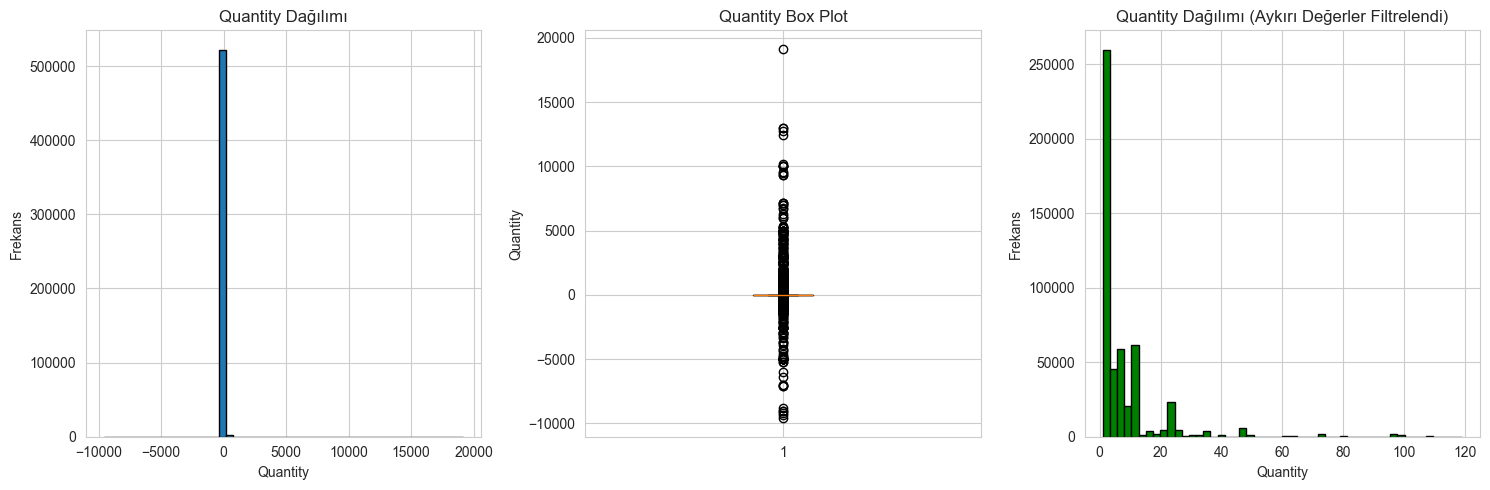

In [4]:
# Hedef değişken (Quantity) analizi
print("=" * 60)
print("🎯 HEDEF DEĞİŞKEN (QUANTITY) ANALİZİ")
print("=" * 60)
print(f"\nQuantity istatistikleri:")
print(df['Quantity'].describe())
print(f"\nNegatif değer sayısı (iade): {(df['Quantity'] < 0).sum()}")
print(f"Sıfır değer sayısı: {(df['Quantity'] == 0).sum()}")
print(f"Pozitif değer sayısı: {(df['Quantity'] > 0).sum()}")

# Quantity dağılımı
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Quantity'], bins=50, edgecolor='black')
plt.title('Quantity Dağılımı')
plt.xlabel('Quantity')
plt.ylabel('Frekans')

plt.subplot(1, 3, 2)
plt.boxplot(df['Quantity'])
plt.title('Quantity Box Plot')
plt.ylabel('Quantity')

plt.subplot(1, 3, 3)
# Aykırı değerleri filtrele
q_filtered = df[df['Quantity'] > 0]['Quantity']
q_filtered = q_filtered[q_filtered < q_filtered.quantile(0.99)]
plt.hist(q_filtered, bins=50, edgecolor='black', color='green')
plt.title('Quantity Dağılımı (Aykırı Değerler Filtrelendi)')
plt.xlabel('Quantity')
plt.ylabel('Frekans')

plt.tight_layout()
plt.show()


## 🧹 4. Veri Temizliği ve Ön İşleme


In [5]:
# Veri temizliği
print("=" * 60)
print("🧹 VERİ TEMİZLİĞİ")
print("=" * 60)

# Orijinal veri boyutu
original_size = len(df)
print(f"\nOrijinal veri boyutu: {original_size:,} satır")

# 1. InvoiceDate'i datetime'a çevir
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# 2. Eksik InvoiceDate'i kaldır
df = df.dropna(subset=['InvoiceDate'])
print(f"InvoiceDate eksik satırlar kaldırıldı: {original_size - len(df):,} satır")

# 3. Negatif ve sıfır Quantity değerlerini kaldır (iade ve hatalı kayıtlar)
df = df[df['Quantity'] > 0]
print(f"Negatif/sıfır Quantity kaldırıldı: {original_size - len(df):,} satır")

# 4. Negatif ve sıfır Price değerlerini kaldır
df = df[df['Price'] > 0]
print(f"Negatif/sıfır Price kaldırıldı: {original_size - len(df):,} satır")

# 5. İptal edilmiş faturaları kaldır (Invoice başında 'C' olanlar)
df = df[~df['Invoice'].astype(str).str.startswith('C')]
print(f"İptal edilmiş faturalar kaldırıldı: {original_size - len(df):,} satır")

# 6. Eksik Description'ları kaldır
df = df.dropna(subset=['Description'])
print(f"Eksik Description kaldırıldı: {original_size - len(df):,} satır")

# 7. Aykırı değerleri temizle (Quantity için)
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]
print(f"Aykırı değerler kaldırıldı: {original_size - len(df):,} satır")

print(f"\n✅ Temizlenmiş veri boyutu: {len(df):,} satır")
print(f"📉 Veri kaybı: {((original_size - len(df)) / original_size * 100):.2f}%")


🧹 VERİ TEMİZLİĞİ

Orijinal veri boyutu: 525,461 satır
InvoiceDate eksik satırlar kaldırıldı: 0 satır
Negatif/sıfır Quantity kaldırıldı: 12,326 satır
Negatif/sıfır Price kaldırıldı: 13,895 satır
İptal edilmiş faturalar kaldırıldı: 13,896 satır
Eksik Description kaldırıldı: 13,896 satır
Aykırı değerler kaldırıldı: 68,874 satır

✅ Temizlenmiş veri boyutu: 456,587 satır
📉 Veri kaybı: 13.11%


## 📊 4.5. Veri Örnekleme (Deneme Aşaması)

**Not:** Deneme aşamasında işlem hızını artırmak için veri setinin %3'ü kullanılacaktır.


In [6]:
# Veri örnekleme - Deneme aşaması için %3 kullan
# NOT: Tam veri seti ile çalışmak için bu hücreyi yorum satırı yapın veya sample_ratio değerini 1.0 yapın
print("=" * 60)
print("📊 VERİ ÖRNEKLEME (DENEME AŞAMASI)")
print("=" * 60)

# Örnekleme oranı (1 = %100, 1.0 = %100 tam veri)
sample_ratio = 1

# Temizlenmiş veri boyutu
cleaned_size = len(df)
print(f"\nTemizlenmiş veri boyutu: {cleaned_size:,} satır")

# Örneklem al (random_state ile tekrarlanabilirlik için)
if sample_ratio < 1.0:
    sample_size = int(cleaned_size * sample_ratio)
    df = df.sample(n=sample_size, random_state=42).reset_index(drop=True)
    print(f"✅ Örneklem boyutu: {len(df):,} satır (%{sample_ratio*100:.1f})")
    print(f"📉 Örneklem oranı: {(len(df) / cleaned_size * 100):.2f}%")
else:
    print(f"✅ Tam veri seti kullanılıyor: {len(df):,} satır")

print(f"\nÖrneklenmiş veri önizleme:")
df.head()


📊 VERİ ÖRNEKLEME (DENEME AŞAMASI)

Temizlenmiş veri boyutu: 456,587 satır
✅ Tam veri seti kullanılıyor: 456,587 satır

Örneklenmiş veri önizleme:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom


## 🔧 5. Özellik Mühendisliği


In [7]:
# Özellik mühendisliği - GENİŞLETİLMİŞ VERSİYON
print("=" * 60)
print("🔧 ÖZELLİK MÜHENDİSLİĞİ (GENİŞLETİLMİŞ)")
print("=" * 60)

# Zaman bazlı özellikler
df['invoice_year'] = df['InvoiceDate'].dt.year
df['invoice_month'] = df['InvoiceDate'].dt.month
df['invoice_day'] = df['InvoiceDate'].dt.day
df['invoice_dow'] = df['InvoiceDate'].dt.dayofweek  # 0=Pazartesi, 6=Pazar
df['invoice_hour'] = df['InvoiceDate'].dt.hour
df['is_weekend'] = (df['invoice_dow'] >= 5).astype(int)

# Döngüsel özellikler (sin/cos dönüşümü)
df['month_sin'] = np.sin(2 * np.pi * df['invoice_month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['invoice_month'] / 12)
df['day_sin'] = np.sin(2 * np.pi * df['invoice_day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['invoice_day'] / 31)
df['dow_sin'] = np.sin(2 * np.pi * df['invoice_dow'] / 7)
df['dow_cos'] = np.cos(2 * np.pi * df['invoice_dow'] / 7)
df['hour_sin'] = np.sin(2 * np.pi * df['invoice_hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['invoice_hour'] / 24)

# Mevsim özellikleri
df['is_spring'] = df['invoice_month'].isin([3, 4, 5]).astype(int)
df['is_summer'] = df['invoice_month'].isin([6, 7, 8]).astype(int)
df['is_autumn'] = df['invoice_month'].isin([9, 10, 11]).astype(int)
df['is_winter'] = df['invoice_month'].isin([12, 1, 2]).astype(int)

# Günün zamanı kategorileri
df['is_morning'] = ((df['invoice_hour'] >= 6) & (df['invoice_hour'] < 12)).astype(int)
df['is_afternoon'] = ((df['invoice_hour'] >= 12) & (df['invoice_hour'] < 18)).astype(int)
df['is_evening'] = ((df['invoice_hour'] >= 18) & (df['invoice_hour'] < 22)).astype(int)
df['is_night'] = ((df['invoice_hour'] >= 22) | (df['invoice_hour'] < 6)).astype(int)

# Toplam tutar ve fiyat özellikleri
df['TotalAmount'] = df['Quantity'] * df['Price']
df['Price_log'] = np.log1p(df['Price'])  # Log transform (Price)
df['TotalAmount_log'] = np.log1p(df['TotalAmount'])  # Log transform (TotalAmount)

# Fiyat kategorileri
df['price_category'] = pd.cut(df['Price'], bins=[0, 1, 2, 5, 10, float('inf')], 
                               labels=['Çok Düşük', 'Düşük', 'Orta', 'Yüksek', 'Çok Yüksek'])
df['price_category_encoded'] = df['price_category'].cat.codes

# Ürün kategorisi (Description'dan ilk kelimeyi al)
df['ProductCategory'] = df['Description'].str.split().str[0].str.upper()

# Description uzunluğu
df['Description_length'] = df['Description'].str.len()

# Müşteri bazlı özellikler (eğer Customer ID varsa)
if 'Customer ID' in df.columns:
    customer_stats = df.groupby('Customer ID').agg({
        'Quantity': ['mean', 'std', 'count'],
        'Price': 'mean'
    }).fillna(0)
    customer_stats.columns = ['customer_avg_quantity', 'customer_std_quantity', 
                              'customer_order_count', 'customer_avg_price']
    df = df.merge(customer_stats, left_on='Customer ID', right_index=True, how='left')
    df['customer_avg_quantity'] = df['customer_avg_quantity'].fillna(0)
    df['customer_std_quantity'] = df['customer_std_quantity'].fillna(0)
    df['customer_order_count'] = df['customer_order_count'].fillna(0)
    df['customer_avg_price'] = df['customer_avg_price'].fillna(0)

print("\n✅ Genişletilmiş özellikler oluşturuldu:")
print("📅 Zaman Bazlı:")
print("   - Temel: year, month, day, dow, hour, is_weekend")
print("   - Döngüsel: month_sin/cos, day_sin/cos, dow_sin/cos, hour_sin/cos")
print("   - Mevsim: is_spring, is_summer, is_autumn, is_winter")
print("   - Günün zamanı: is_morning, is_afternoon, is_evening, is_night")
print("💰 Fiyat ve Tutar:")
print("   - TotalAmount, Price_log, TotalAmount_log")
print("   - price_category, price_category_encoded")
print("📦 Ürün:")
print("   - ProductCategory, Description_length")
if 'Customer ID' in df.columns:
    print("👤 Müşteri:")
    print("   - customer_avg_quantity, customer_std_quantity")
    print("   - customer_order_count, customer_avg_price")

# Güncellenmiş veri önizleme
print("\n📊 Güncellenmiş veri önizleme:")
preview_cols = ['Quantity', 'Price', 'Country', 'invoice_month', 'invoice_dow', 
                'invoice_hour', 'is_weekend', 'TotalAmount', 'Price_log']
if 'Customer ID' in df.columns:
    preview_cols.extend(['customer_avg_quantity', 'customer_order_count'])
df[preview_cols].head()


🔧 ÖZELLİK MÜHENDİSLİĞİ (GENİŞLETİLMİŞ)

✅ Genişletilmiş özellikler oluşturuldu:
📅 Zaman Bazlı:
   - Temel: year, month, day, dow, hour, is_weekend
   - Döngüsel: month_sin/cos, day_sin/cos, dow_sin/cos, hour_sin/cos
   - Mevsim: is_spring, is_summer, is_autumn, is_winter
   - Günün zamanı: is_morning, is_afternoon, is_evening, is_night
💰 Fiyat ve Tutar:
   - TotalAmount, Price_log, TotalAmount_log
   - price_category, price_category_encoded
📦 Ürün:
   - ProductCategory, Description_length
👤 Müşteri:
   - customer_avg_quantity, customer_std_quantity
   - customer_order_count, customer_avg_price

📊 Güncellenmiş veri önizleme:


,Quantity,Price,Country,invoice_month,invoice_dow,invoice_hour,is_weekend,TotalAmount,Price_log,customer_avg_quantity,customer_order_count
0,12,6.95,United Kingdom,12,1,7,0,83.4,2.073172,9.207547,53.0
1,12,6.75,United Kingdom,12,1,7,0,81.0,2.047693,9.207547,53.0
2,12,6.75,United Kingdom,12,1,7,0,81.0,2.047693,9.207547,53.0
7,10,5.95,United Kingdom,12,1,7,0,59.5,1.938742,9.207547,53.0
8,12,2.55,United Kingdom,12,1,7,0,30.6,1.266948,9.207547,53.0


## 📈 6. Veri Görselleştirme


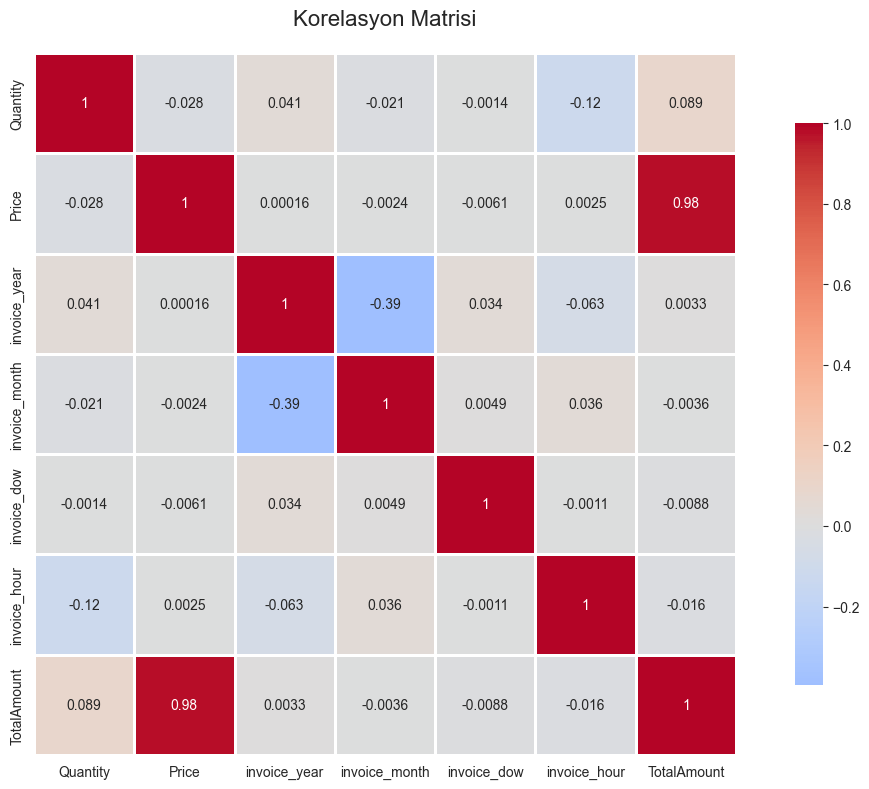

In [8]:
# Korelasyon matrisi
plt.figure(figsize=(12, 8))
numeric_cols = ['Quantity', 'Price', 'invoice_year', 'invoice_month', 
                'invoice_dow', 'invoice_hour', 'TotalAmount']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Korelasyon Matrisi', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


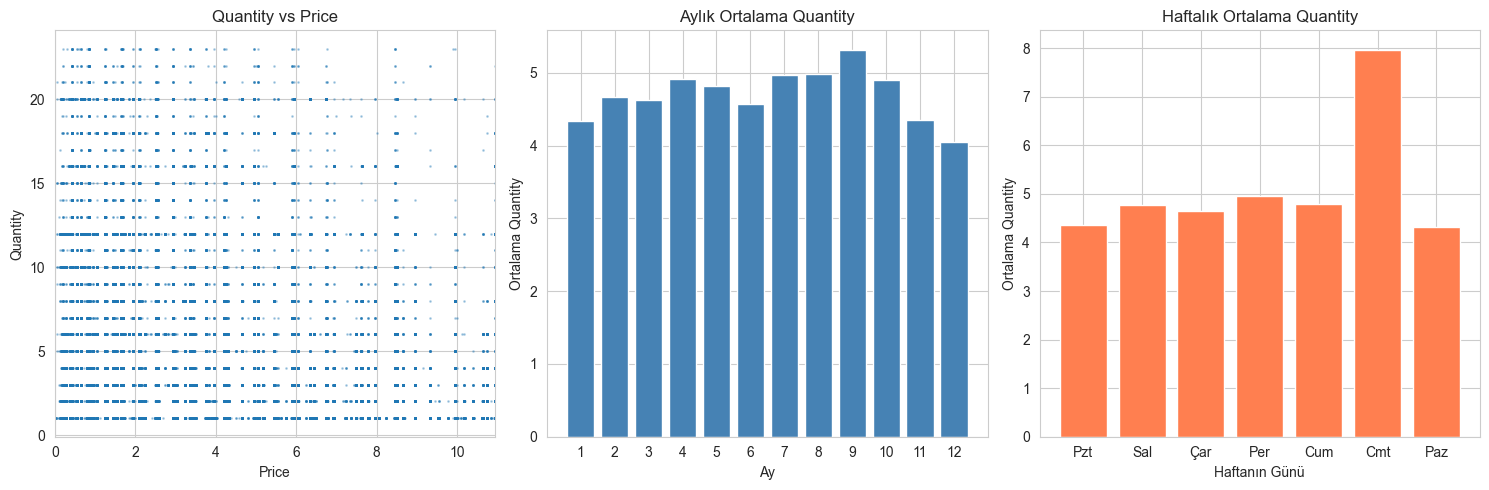

In [9]:
# Quantity vs Price scatter plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['Price'], df['Quantity'], alpha=0.3, s=1)
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Quantity vs Price')
plt.xlim(0, df['Price'].quantile(0.95))

plt.subplot(1, 3, 2)
monthly_avg = df.groupby('invoice_month')['Quantity'].mean()
plt.bar(monthly_avg.index, monthly_avg.values, color='steelblue')
plt.xlabel('Ay')
plt.ylabel('Ortalama Quantity')
plt.title('Aylık Ortalama Quantity')
plt.xticks(range(1, 13))

plt.subplot(1, 3, 3)
dow_avg = df.groupby('invoice_dow')['Quantity'].mean()
days = ['Pzt', 'Sal', 'Çar', 'Per', 'Cum', 'Cmt', 'Paz']
plt.bar(range(7), dow_avg.values, color='coral')
plt.xlabel('Haftanın Günü')
plt.ylabel('Ortalama Quantity')
plt.title('Haftalık Ortalama Quantity')
plt.xticks(range(7), days)

plt.tight_layout()
plt.show()


## 🤖 7. Model Eğitimi için Veri Hazırlığı


In [10]:
# Model için özellik seçimi - GENİŞLETİLMİŞ ÖZELLİKLER
print("=" * 60)
print("📋 MODEL VERİ HAZIRLIĞI (GENİŞLETİLMİŞ)")
print("=" * 60)

# Sayısal özellikler (genişletilmiş)
numeric_features = [
    'Price', 'Price_log',  # Fiyat özellikleri
    'invoice_year', 'invoice_month', 'invoice_day', 'invoice_dow', 'invoice_hour',
    'is_weekend',  # Temel zaman özellikleri
    'month_sin', 'month_cos', 'day_sin', 'day_cos', 'dow_sin', 'dow_cos', 
    'hour_sin', 'hour_cos',  # Döngüsel özellikler
    'is_spring', 'is_summer', 'is_autumn', 'is_winter',  # Mevsim
    'is_morning', 'is_afternoon', 'is_evening', 'is_night',  # Günün zamanı
    'TotalAmount', 'TotalAmount_log',  # Tutar özellikleri
    'price_category_encoded',  # Fiyat kategorisi
    'Description_length'  # Ürün açıklama uzunluğu
]

# Müşteri özellikleri (varsa)
if 'Customer ID' in df.columns:
    numeric_features.extend(['customer_avg_quantity', 'customer_std_quantity', 
                            'customer_order_count', 'customer_avg_price'])

# Kategorik özellikler
categorical_features = ['Country']

# Hedef değişken - LOG TRANSFORM UYGULANACAK
target = 'Quantity'
use_log_transform = True  # Log transform kullan/kullanma

# Veri hazırlama
X = df[numeric_features + categorical_features].copy()
y_original = df[target].copy()

# Log transform uygula (Quantity için)
if use_log_transform:
    y = np.log1p(y_original)  # log(1+x) kullanarak sıfır değerlerini koruyoruz
    print(f"\n✅ Log transform uygulandı: y = log1p(Quantity)")
    print(f"   Orijinal Quantity ortalaması: {y_original.mean():.2f}")
    print(f"   Log transform sonrası ortalaması: {y.mean():.2f}")
else:
    y = y_original.copy()
    print(f"\n⚠️ Log transform uygulanmadı")

# Country için Label Encoding
le_country = LabelEncoder()
X['Country_encoded'] = le_country.fit_transform(X['Country'])
X = X.drop('Country', axis=1)

# Eksik değer kontrolü ve doldurma
print(f"\n📊 Eksik değer kontrolü:")
missing = X.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
    X = X.fillna(0)  # Eksik değerleri 0 ile doldur
    print("✅ Eksik değerler 0 ile dolduruldu")
else:
    print("✅ Eksik değer yok")

print(f"\nÖzellik sayısı: {X.shape[1]}")
print(f"Örnek sayısı: {X.shape[0]:,}")
print(f"\nKullanılan özellikler ({len(X.columns)} adet):")
for i, col in enumerate(X.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nHedef değişken: {target}")
if use_log_transform:
    print(f"   (Log transform uygulandı: log1p(Quantity))")
print(f"Hedef değişken istatistikleri:")
print(y.describe())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Orijinal y değerlerini de sakla (karşılaştırma için)
# train_test_split aynı index'leri kullanır, bu yüzden y_original'ı da aynı şekilde split ediyoruz
_, _, y_train_original, y_test_original = train_test_split(
    X, y_original, test_size=0.2, random_state=42
)

print(f"\n✅ Veri bölündü:")
print(f"Eğitim seti: {X_train.shape[0]:,} örnek")
print(f"Test seti: {X_test.shape[0]:,} örnek")

# Özellik ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Özellikler ölçeklendirildi (StandardScaler)")
print(f"   Toplam özellik sayısı: {X_train.shape[1]}")


📋 MODEL VERİ HAZIRLIĞI (GENİŞLETİLMİŞ)

✅ Log transform uygulandı: y = log1p(Quantity)
   Orijinal Quantity ortalaması: 4.65
   Log transform sonrası ortalaması: 1.46

📊 Eksik değer kontrolü:
✅ Eksik değer yok

Özellik sayısı: 33
Örnek sayısı: 456,587

Kullanılan özellikler (33 adet):
 1. Price
 2. Price_log
 3. invoice_year
 4. invoice_month
 5. invoice_day
 6. invoice_dow
 7. invoice_hour
 8. is_weekend
 9. month_sin
10. month_cos
11. day_sin
12. day_cos
13. dow_sin
14. dow_cos
15. hour_sin
16. hour_cos
17. is_spring
18. is_summer
19. is_autumn
20. is_winter
21. is_morning
22. is_afternoon
23. is_evening
24. is_night
25. TotalAmount
26. TotalAmount_log
27. price_category_encoded
28. Description_length
29. customer_avg_quantity
30. customer_std_quantity
31. customer_order_count
32. customer_avg_price
33. Country_encoded

Hedef değişken: Quantity
   (Log transform uygulandı: log1p(Quantity))
Hedef değişken istatistikleri:
count    456587.000000
mean          1.464433
std           0.71

## 🎯 8. Model Eğitimi ve Değerlendirme


In [11]:
# Model eğitimi ve değerlendirme fonksiyonu (Log transform desteği ile)
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, 
                   y_train_original=None, y_test_original=None, use_log_transform=False):
    """Model eğitir ve değerlendirme metriklerini döndürür
    
    Args:
        model: Eğitilecek model
        X_train, X_test: Özellik matrisleri
        y_train, y_test: Hedef değişken (log transform uygulanmış olabilir)
        model_name: Model adı
        y_train_original, y_test_original: Orijinal hedef değişken (log transform öncesi)
        use_log_transform: Log transform kullanıldı mı?
    """
    # Model eğitimi
    model.fit(X_train, y_train)
    
    # Tahminler (log space'de)
    y_train_pred_log = model.predict(X_train)
    y_test_pred_log = model.predict(X_test)
    
    # Log transform geri al (eğer kullanıldıysa)
    if use_log_transform and y_train_original is not None and y_test_original is not None:
        y_train_pred = np.expm1(y_train_pred_log)  # exp(x) - 1
        y_test_pred = np.expm1(y_test_pred_log)
        y_train_actual = y_train_original.values
        y_test_actual = y_test_original.values
    else:
        y_train_pred = y_train_pred_log
        y_test_pred = y_test_pred_log
        y_train_actual = y_train.values
        y_test_actual = y_test.values
    
    # Metrikler (orijinal scale'de)
    train_rmse = np.sqrt(mean_squared_error(y_train_actual, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test_actual, y_test_pred))
    train_mae = mean_absolute_error(y_train_actual, y_train_pred)
    test_mae = mean_absolute_error(y_test_actual, y_test_pred)
    train_r2 = r2_score(y_train_actual, y_train_pred)
    test_r2 = r2_score(y_test_actual, y_test_pred)
    
    # Cross-validation score (log space'de)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    results = {
        'Model': model_name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'CV_R2_Mean': cv_scores.mean(),
        'CV_R2_Std': cv_scores.std(),
        'model': model
    }
    
    return results, y_test_pred

# Sonuçları saklamak için liste
results_list = []
predictions_dict = {}

print("=" * 60)
print("🤖 MODEL EĞİTİMİ BAŞLIYOR")
print("=" * 60)


🤖 MODEL EĞİTİMİ BAŞLIYOR


### 1️⃣ Linear Regression (Doğrusal Regresyon)

**Açıklama**: En basit ve yaygın kullanılan regresyon yöntemidir. Özellikler ile hedef değişken arasında doğrusal bir ilişki varsayar.

**Avantajları**: 
- Hızlı eğitim süresi
- Yorumlanabilir sonuçlar
- Overfitting riski düşük

**Dezavantajları**: 
- Karmaşık, doğrusal olmayan ilişkileri yakalayamaz
- Çoklu doğrusal bağlantı (multicollinearity) sorunlarına duyarlı


In [12]:
# 1. Linear Regression
print("\n1️⃣ Linear Regression eğitiliyor...")
lr = LinearRegression()
lr_results, lr_pred = evaluate_model(
    lr, X_train_scaled, X_test_scaled, y_train, y_test, "Linear Regression",
    y_train_original=y_train_original, y_test_original=y_test_original, 
    use_log_transform=use_log_transform
)
results_list.append(lr_results)
predictions_dict['Linear Regression'] = lr_pred
print("✅ Tamamlandı!")



1️⃣ Linear Regression eğitiliyor...
✅ Tamamlandı!


### 2️⃣ Ridge Regression (Ridge Regresyon)

**Açıklama**: Linear Regression'a L2 regularizasyonu eklenmiş versiyonudur. Aşırı öğrenmeyi (overfitting) önlemek için katsayıları küçültür.

**Avantajları**: 
- Overfitting'i azaltır
- Çoklu doğrusal bağlantı sorunlarını çözer
- Tüm özellikleri korur (özellik seçimi yapmaz)

**Dezavantajları**: 
- Hiperparametre ayarı gerektirir (alpha)
- Özellik seçimi yapmaz


In [13]:
# 2. Ridge Regression (Hiperparametre Optimizasyonu ile)
print("\n2️⃣ Ridge Regression eğitiliyor (Hiperparametre Optimizasyonu ile)...")
ridge_param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]}
ridge_base = Ridge()
ridge_grid = GridSearchCV(ridge_base, ridge_param_grid, cv=3, scoring='r2', n_jobs=-1)  # CV=3 (5 yerine)
ridge_grid.fit(X_train_scaled, y_train)
ridge = Ridge(alpha=ridge_grid.best_params_['alpha'])
print(f"   ✅ En iyi alpha: {ridge_grid.best_params_['alpha']}")
ridge_results, ridge_pred = evaluate_model(
    ridge, X_train_scaled, X_test_scaled, y_train, y_test, "Ridge Regression (Optimized)",
    y_train_original=y_train_original, y_test_original=y_test_original, 
    use_log_transform=use_log_transform
)
results_list.append(ridge_results)
predictions_dict['Ridge Regression (Optimized)'] = ridge_pred
print("✅ Tamamlandı!")



2️⃣ Ridge Regression eğitiliyor (Hiperparametre Optimizasyonu ile)...
   ✅ En iyi alpha: 10.0
✅ Tamamlandı!


### 3️⃣ Lasso Regression (Lasso Regresyon)

**Açıklama**: Linear Regression'a L1 regularizasyonu eklenmiş versiyonudur. Önemsiz özelliklerin katsayılarını sıfıra indirerek otomatik özellik seçimi yapar.

**Avantajları**: 
- Otomatik özellik seçimi
- Overfitting'i azaltır
- Modeli sadeleştirir

**Dezavantajları**: 
- Bazı özellikleri tamamen kaldırabilir
- Hiperparametre ayarı gerektirir (alpha)


In [14]:
# 3. Lasso Regression (Hiperparametre Optimizasyonu ile)
print("\n3️⃣ Lasso Regression eğitiliyor (Hiperparametre Optimizasyonu ile)...")
lasso_param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]}
lasso_base = Lasso(max_iter=2000)
lasso_grid = GridSearchCV(lasso_base, lasso_param_grid, cv=3, scoring='r2', n_jobs=-1)  # CV=3 (5 yerine)
lasso_grid.fit(X_train_scaled, y_train)
lasso = Lasso(alpha=lasso_grid.best_params_['alpha'], max_iter=2000)
print(f"   ✅ En iyi alpha: {lasso_grid.best_params_['alpha']}")
lasso_results, lasso_pred = evaluate_model(
    lasso, X_train_scaled, X_test_scaled, y_train, y_test, "Lasso Regression (Optimized)",
    y_train_original=y_train_original, y_test_original=y_test_original, 
    use_log_transform=use_log_transform
)
results_list.append(lasso_results)
predictions_dict['Lasso Regression (Optimized)'] = lasso_pred
print("✅ Tamamlandı!")



3️⃣ Lasso Regression eğitiliyor (Hiperparametre Optimizasyonu ile)...
   ✅ En iyi alpha: 0.01
✅ Tamamlandı!


### 4️⃣ Random Forest Regressor (Rastgele Orman Regresyonu)

**Açıklama**: Birden fazla karar ağacının birleşiminden oluşan ensemble yöntemidir. Her ağaç farklı veri alt kümeleri üzerinde eğitilir ve sonuçlar ortalaması alınır.

**Avantajları**: 
- Doğrusal olmayan ilişkileri yakalayabilir
- Aykırı değerlere karşı dayanıklı
- Özellik önem sıralaması sağlar
- Overfitting riski düşük (çok sayıda ağaç ile)

**Dezavantajları**: 
- Yorumlanması zor
- Eğitim süresi uzun olabilir
- Daha fazla bellek kullanır


In [15]:
# 4. Random Forest Regressor (Hızlı Hiperparametre Optimizasyonu ile)
print("\n4️⃣ Random Forest Regressor eğitiliyor (Hızlı Hiperparametre Optimizasyonu ile)...")
print("   ⚡ RandomizedSearchCV kullanılıyor (daha hızlı)")
# Daha az parametre kombinasyonu ile hızlı optimizasyon
rf_param_dist = {
    'n_estimators': [100, 150],  # 200'ü kaldırdık
    'max_depth': [15, 20, None],  # 10'u kaldırdık
    'min_samples_split': [2, 5]
}
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)
# RandomizedSearchCV kullan (daha hızlı, rastgele örnekleme)
rf_search = RandomizedSearchCV(
    rf_base, rf_param_dist, 
    n_iter=6,  # Sadece 6 kombinasyon dene (toplam 2*3*2=12 yerine)
    cv=2,  # CV sayısını 2'ye düşürdük (3 yerine)
    scoring='r2', 
    n_jobs=-1, 
    random_state=42,
    verbose=1
)
rf_search.fit(X_train, y_train)
rf = RandomForestRegressor(**rf_search.best_params_, random_state=42, n_jobs=-1)
print(f"   ✅ En iyi parametreler: {rf_search.best_params_}")
print(f"   ⚡ Toplam {rf_search.n_iter * rf_search.cv} model eğitildi (GridSearchCV'de 36 olurdu)")
rf_results, rf_pred = evaluate_model(
    rf, X_train, X_test, y_train, y_test, "Random Forest (Optimized)",
    y_train_original=y_train_original, y_test_original=y_test_original, 
    use_log_transform=use_log_transform
)
results_list.append(rf_results)
predictions_dict['Random Forest (Optimized)'] = rf_pred
print("✅ Tamamlandı!")



4️⃣ Random Forest Regressor eğitiliyor (Hızlı Hiperparametre Optimizasyonu ile)...
   ⚡ RandomizedSearchCV kullanılıyor (daha hızlı)
Fitting 2 folds for each of 6 candidates, totalling 12 fits
   ✅ En iyi parametreler: {'n_estimators': 150, 'min_samples_split': 2, 'max_depth': None}
   ⚡ Toplam 12 model eğitildi (GridSearchCV'de 36 olurdu)
✅ Tamamlandı!


### 5️⃣ XGBoost Regressor (Extreme Gradient Boosting)

**Açıklama**: Gradient Boosting algoritmasının optimize edilmiş ve hızlandırılmış versiyonudur. Zayıf öğrenicileri (weak learners) sıralı olarak birleştirerek güçlü bir model oluşturur.

**Avantajları**: 
- Çok yüksek performans
- Doğrusal olmayan ilişkileri yakalayabilir
- Eksik değerleri otomatik işler
- Özellik önem sıralaması sağlar

**Dezavantajları**: 
- Hiperparametre ayarı karmaşık
- Eğitim süresi uzun olabilir
- Overfitting riski yüksek (dikkatli ayarlanmalı)


In [16]:
# 5. XGBoost Regressor (Hızlı Hiperparametre Optimizasyonu ile)
print("\n5️⃣ XGBoost Regressor eğitiliyor (Hızlı Hiperparametre Optimizasyonu ile)...")
print("   ⚡ RandomizedSearchCV kullanılıyor (daha hızlı)")
xgb_param_dist = {
    'n_estimators': [100, 150],  # 200'ü kaldırdık
    'max_depth': [5, 7],  # 3'ü kaldırdık
    'learning_rate': [0.1, 0.2]  # 0.01'i kaldırdık
}
xgb_base = xgb.XGBRegressor(random_state=42, n_jobs=-1)
# RandomizedSearchCV kullan (daha hızlı)
xgb_search = RandomizedSearchCV(
    xgb_base, xgb_param_dist,
    n_iter=6,  # Sadece 6 kombinasyon dene
    cv=2,  # CV sayısını 2'ye düşürdük
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
xgb_search.fit(X_train, y_train)
xgb_model = xgb.XGBRegressor(**xgb_search.best_params_, random_state=42, n_jobs=-1)
print(f"   ✅ En iyi parametreler: {xgb_search.best_params_}")
print(f"   ⚡ Toplam {xgb_search.n_iter * xgb_search.cv} model eğitildi (GridSearchCV'de 54 olurdu)")
xgb_results, xgb_pred = evaluate_model(
    xgb_model, X_train, X_test, y_train, y_test, "XGBoost (Optimized)",
    y_train_original=y_train_original, y_test_original=y_test_original, 
    use_log_transform=use_log_transform
)
results_list.append(xgb_results)
predictions_dict['XGBoost (Optimized)'] = xgb_pred
print("✅ Tamamlandı!")



5️⃣ XGBoost Regressor eğitiliyor (Hızlı Hiperparametre Optimizasyonu ile)...
   ⚡ RandomizedSearchCV kullanılıyor (daha hızlı)
Fitting 2 folds for each of 6 candidates, totalling 12 fits
   ✅ En iyi parametreler: {'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.2}
   ⚡ Toplam 12 model eğitildi (GridSearchCV'de 54 olurdu)
✅ Tamamlandı!


### 6️⃣ Gradient Boosting Regressor

**Açıklama**: Zayıf öğrenicileri sıralı olarak birleştiren ensemble yöntemidir. Her yeni model önceki modellerin hatalarını düzeltmeye çalışır.

**Avantajları**: 
- Yüksek performans
- Doğrusal olmayan ilişkileri yakalayabilir
- Özellik önem sıralaması sağlar

**Dezavantajları**: 
- Eğitim süresi uzun olabilir
- Hiperparametre ayarı gerektirir


In [17]:
# 6. Gradient Boosting Regressor (Hızlı Hiperparametre Optimizasyonu ile)
print("\n6️⃣ Gradient Boosting Regressor eğitiliyor (Hızlı Hiperparametre Optimizasyonu ile)...")
print("   ⚡ RandomizedSearchCV kullanılıyor (daha hızlı)")
gb_param_dist = {
    'n_estimators': [100, 150],
    'max_depth': [5, 7],
    'learning_rate': [0.1, 0.2]
}
gb_base = GradientBoostingRegressor(random_state=42)
gb_search = RandomizedSearchCV(
    gb_base, gb_param_dist,
    n_iter=6,
    cv=2,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
gb_search.fit(X_train, y_train)
gb_model = GradientBoostingRegressor(**gb_search.best_params_, random_state=42)
print(f"   ✅ En iyi parametreler: {gb_search.best_params_}")
print(f"   ⚡ Toplam {gb_search.n_iter * gb_search.cv} model eğitildi")
gb_results, gb_pred = evaluate_model(
    gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting (Optimized)",
    y_train_original=y_train_original, y_test_original=y_test_original, 
    use_log_transform=use_log_transform
)
results_list.append(gb_results)
predictions_dict['Gradient Boosting (Optimized)'] = gb_pred
print("✅ Tamamlandı!")



6️⃣ Gradient Boosting Regressor eğitiliyor (Hızlı Hiperparametre Optimizasyonu ile)...
   ⚡ RandomizedSearchCV kullanılıyor (daha hızlı)
Fitting 2 folds for each of 6 candidates, totalling 12 fits
   ✅ En iyi parametreler: {'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.2}
   ⚡ Toplam 12 model eğitildi
✅ Tamamlandı!


### 7️⃣ LightGBM Regressor (Eğer mevcut ise)

**Açıklama**: Microsoft tarafından geliştirilen, XGBoost'a alternatif hızlı gradient boosting algoritmasıdır.

**Avantajları**: 
- Çok hızlı eğitim
- Yüksek performans
- Düşük bellek kullanımı

**Dezavantajları**: 
- Küçük veri setlerinde overfitting riski


In [18]:
# 7. LightGBM Regressor (Eğer mevcut ise)
if LIGHTGBM_AVAILABLE:
    print("\n7️⃣ LightGBM Regressor eğitiliyor (Hızlı Hiperparametre Optimizasyonu ile)...")
    print("   ⚡ RandomizedSearchCV kullanılıyor (daha hızlı)")
    lgb_param_dist = {
        'n_estimators': [100, 150],
        'max_depth': [5, 7],
        'learning_rate': [0.1, 0.2]
    }
    lgb_base = lgb.LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1)
    lgb_search = RandomizedSearchCV(
        lgb_base, lgb_param_dist,
        n_iter=6,
        cv=2,
        scoring='r2',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    lgb_search.fit(X_train, y_train)
    lgb_model = lgb.LGBMRegressor(**lgb_search.best_params_, random_state=42, n_jobs=-1, verbose=-1)
    print(f"   ✅ En iyi parametreler: {lgb_search.best_params_}")
    print(f"   ⚡ Toplam {lgb_search.n_iter * lgb_search.cv} model eğitildi")
    lgb_results, lgb_pred = evaluate_model(
        lgb_model, X_train, X_test, y_train, y_test, "LightGBM (Optimized)",
        y_train_original=y_train_original, y_test_original=y_test_original, 
        use_log_transform=use_log_transform
    )
    results_list.append(lgb_results)
    predictions_dict['LightGBM (Optimized)'] = lgb_pred
    print("✅ Tamamlandı!")
else:
    print("\n7️⃣ LightGBM atlandı (kütüphane yüklü değil)")



7️⃣ LightGBM Regressor eğitiliyor (Hızlı Hiperparametre Optimizasyonu ile)...
   ⚡ RandomizedSearchCV kullanılıyor (daha hızlı)
Fitting 2 folds for each of 6 candidates, totalling 12 fits
   ✅ En iyi parametreler: {'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.2}
   ⚡ Toplam 12 model eğitildi
✅ Tamamlandı!


## 📊 9. Baseline vs İyileştirilmiş Model Karşılaştırması


In [ ]:
# Baseline sonuçlarını yükle
print("=" * 80)
print("📊 BASELINE vs İYİLEŞTİRİLMİŞ MODEL KARŞILAŞTIRMASI")
print("=" * 80)

baseline_path = BASE_DIR / "baseline_results.csv"
if baseline_path.exists():
    baseline_df = pd.read_csv(baseline_path)
    print("\n✅ Baseline sonuçları yüklendi")
    
    # İyileştirilmiş sonuçları hazırla
    improved_df = results_df.copy()
    
    # Model isimlerini eşleştir (baseline'daki isimlerle)
    model_mapping = {
        'Linear Regression': 'Linear Regression',
        'Ridge Regression': 'Ridge Regression (Optimized)',
        'Lasso Regression': 'Lasso Regression (Optimized)',
        'Random Forest': 'Random Forest (Optimized)',
        'XGBoost': 'XGBoost (Optimized)'
    }
    
    # Karşılaştırma DataFrame'i oluştur
    comparison_data = []
    for baseline_model, improved_model in model_mapping.items():
        baseline_row = baseline_df[baseline_df['Model'] == baseline_model].iloc[0]
        if improved_model in improved_df['Model'].values:
            improved_row = improved_df[improved_df['Model'] == improved_model].iloc[0]
            
            comparison_data.append({
                'Model': baseline_model,
                'Baseline_Test_R2': baseline_row['Test_R2'],
                'Improved_Test_R2': improved_row['Test_R2'],
                'R2_Improvement': improved_row['Test_R2'] - baseline_row['Test_R2'],
                'R2_Improvement_Pct': ((improved_row['Test_R2'] - baseline_row['Test_R2']) / abs(baseline_row['Test_R2']) * 100) if baseline_row['Test_R2'] != 0 else 0,
                'Baseline_Test_RMSE': baseline_row['Test_RMSE'],
                'Improved_Test_RMSE': improved_row['Test_RMSE'],
                'RMSE_Improvement': baseline_row['Test_RMSE'] - improved_row['Test_RMSE'],  # Negatif = iyileşme
                'Baseline_Test_MAE': baseline_row['Test_MAE'],
                'Improved_Test_MAE': improved_row['Test_MAE'],
                'MAE_Improvement': baseline_row['Test_MAE'] - improved_row['Test_MAE']  # Negatif = iyileşme
            })
    
    comparison_df = pd.DataFrame(comparison_data)
    
    print("\n📈 Model Karşılaştırması:")
    print(comparison_df.to_string(index=False))
    
    # Karşılaştırmayı kaydet
    comparison_path = BASE_DIR / "model_comparison.csv"
    comparison_df.to_csv(comparison_path, index=False)
    print(f"\n✅ Karşılaştırma kaydedildi: {comparison_path}")
    
    # Görselleştirme
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. R² Karşılaştırması
    ax1 = axes[0, 0]
    x = np.arange(len(comparison_df))
    width = 0.35
    ax1.bar(x - width/2, comparison_df['Baseline_Test_R2'], width, 
            label='Baseline', alpha=0.8, color='red')
    ax1.bar(x + width/2, comparison_df['Improved_Test_R2'], width, 
            label='İyileştirilmiş', alpha=0.8, color='green')
    ax1.set_xlabel('Model')
    ax1.set_ylabel('Test R² Score')
    ax1.set_title('Baseline vs İyileştirilmiş: R² Karşılaştırması')
    ax1.set_xticks(x)
    ax1.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    
    # 2. RMSE Karşılaştırması
    ax2 = axes[0, 1]
    ax2.bar(x - width/2, comparison_df['Baseline_Test_RMSE'], width, 
            label='Baseline', alpha=0.8, color='red')
    ax2.bar(x + width/2, comparison_df['Improved_Test_RMSE'], width, 
            label='İyileştirilmiş', alpha=0.8, color='green')
    ax2.set_xlabel('Model')
    ax2.set_ylabel('Test RMSE')
    ax2.set_title('Baseline vs İyileştirilmiş: RMSE Karşılaştırması')
    ax2.set_xticks(x)
    ax2.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    
    # 3. MAE Karşılaştırması
    ax3 = axes[1, 0]
    ax3.bar(x - width/2, comparison_df['Baseline_Test_MAE'], width, 
            label='Baseline', alpha=0.8, color='red')
    ax3.bar(x + width/2, comparison_df['Improved_Test_MAE'], width, 
            label='İyileştirilmiş', alpha=0.8, color='green')
    ax3.set_xlabel('Model')
    ax3.set_ylabel('Test MAE')
    ax3.set_title('Baseline vs İyileştirilmiş: MAE Karşılaştırması')
    ax3.set_xticks(x)
    ax3.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
    
    # 4. İyileştirme Yüzdeleri
    ax4 = axes[1, 1]
    colors_bar = ['green' if x > 0 else 'red' for x in comparison_df['R2_Improvement']]
    ax4.barh(comparison_df['Model'], comparison_df['R2_Improvement_Pct'], color=colors_bar, alpha=0.8)
    ax4.set_xlabel('R² İyileştirme (%)')
    ax4.set_title('R² İyileştirme Yüzdeleri')
    ax4.axvline(x=0, color='black', linestyle='--', linewidth=1)
    ax4.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
    
    # Özet
    print("\n" + "=" * 80)
    print("📊 İYİLEŞTİRME ÖZETİ")
    print("=" * 80)
    for idx, row in comparison_df.iterrows():
        print(f"\n{row['Model']}:")
        print(f"  R²: {row['Baseline_Test_R2']:.4f} → {row['Improved_Test_R2']:.4f} "
              f"({row['R2_Improvement']:+.4f}, {row['R2_Improvement_Pct']:+.2f}%)")
        print(f"  RMSE: {row['Baseline_Test_RMSE']:.4f} → {row['Improved_Test_RMSE']:.4f} "
              f"({row['RMSE_Improvement']:+.4f})")
        print(f"  MAE: {row['Baseline_Test_MAE']:.4f} → {row['Improved_Test_MAE']:.4f} "
              f"({row['MAE_Improvement']:+.4f})")
    
else:
    print(f"\n⚠️ Baseline sonuçları bulunamadı: {baseline_path}")
    print("   Baseline sonuçları olmadan karşılaştırma yapılamıyor.")


📊 BASELINE vs İYİLEŞTİRİLMİŞ MODEL KARŞILAŞTIRMASI

✅ Baseline sonuçları yüklendi


NameError: name 'results_df' is not defined

: 

## 📊 10. Model Karşılaştırması


In [ ]:
# Sonuçları DataFrame'e dönüştür
results_df = pd.DataFrame(results_list)
results_df = results_df.drop('model', axis=1)  # model objesini kaldır

# Sonuçları göster
print("=" * 80)
print("📊 MODEL KARŞILAŞTIRMA SONUÇLARI")
print("=" * 80)
print("\nMetrikler:")
print(results_df.to_string(index=False))

# En iyi modeli belirle (Test_R2'ye göre)
best_model_idx = results_df['Test_R2'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_model = results_list[best_model_idx]['model']

print(f"\n🏆 En İyi Model: {best_model_name}")
print(f"   Test R² Score: {results_df.loc[best_model_idx, 'Test_R2']:.4f}")
print(f"   Test RMSE: {results_df.loc[best_model_idx, 'Test_RMSE']:.4f}")
print(f"   Test MAE: {results_df.loc[best_model_idx, 'Test_MAE']:.4f}")


In [ ]:
# Model karşılaştırma görselleştirmesi
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. R² Score karşılaştırması
ax1 = axes[0, 0]
models = results_df['Model']
train_r2 = results_df['Train_R2']
test_r2 = results_df['Test_R2']
x = np.arange(len(models))
width = 0.35
ax1.bar(x - width/2, train_r2, width, label='Train R²', alpha=0.8)
ax1.bar(x + width/2, test_r2, width, label='Test R²', alpha=0.8)
ax1.set_xlabel('Model')
ax1.set_ylabel('R² Score')
ax1.set_title('R² Score Karşılaştırması')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. RMSE karşılaştırması
ax2 = axes[0, 1]
train_rmse = results_df['Train_RMSE']
test_rmse = results_df['Test_RMSE']
ax2.bar(x - width/2, train_rmse, width, label='Train RMSE', alpha=0.8, color='orange')
ax2.bar(x + width/2, test_rmse, width, label='Test RMSE', alpha=0.8, color='red')
ax2.set_xlabel('Model')
ax2.set_ylabel('RMSE')
ax2.set_title('RMSE Karşılaştırması')
ax2.set_xticks(x)
ax2.set_xticklabels(models, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. MAE karşılaştırması
ax3 = axes[1, 0]
train_mae = results_df['Train_MAE']
test_mae = results_df['Test_MAE']
ax3.bar(x - width/2, train_mae, width, label='Train MAE', alpha=0.8, color='green')
ax3.bar(x + width/2, test_mae, width, label='Test MAE', alpha=0.8, color='purple')
ax3.set_xlabel('Model')
ax3.set_ylabel('MAE')
ax3.set_title('MAE Karşılaştırması')
ax3.set_xticks(x)
ax3.set_xticklabels(models, rotation=45, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Cross-Validation R²
ax4 = axes[1, 1]
cv_mean = results_df['CV_R2_Mean']
cv_std = results_df['CV_R2_Std']
ax4.bar(models, cv_mean, yerr=cv_std, alpha=0.8, color='teal', capsize=5)
ax4.set_xlabel('Model')
ax4.set_ylabel('CV R² Score')
ax4.set_title('Cross-Validation R² Score (Mean ± Std)')
ax4.set_xticklabels(models, rotation=45, ha='right')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# Gerçek vs Tahmin görselleştirmesi (En iyi model için)
# best_model_name değişkeninin tanımlı olduğundan emin ol
if 'best_model_name' not in globals():
    # Eğer tanımlı değilse, Cell 25'i çalıştır
    print("⚠️ Uyarı: best_model_name tanımlı değil. Önce Cell 25'i çalıştırın!")
    # En iyi modeli bul
    if 'results_df' in globals() and len(results_df) > 0:
        best_model_idx = results_df['Test_R2'].idxmax()
        best_model_name = results_df.loc[best_model_idx, 'Model']
        best_model = results_list[best_model_idx]['model']
        print(f"✅ En iyi model bulundu: {best_model_name}")
    else:
        raise ValueError("Model sonuçları bulunamadı! Önce model eğitim hücrelerini çalıştırın.")

best_pred = predictions_dict[best_model_name]

plt.figure(figsize=(15, 5))

# Scatter plot
plt.subplot(1, 3, 1)
plt.scatter(y_test, best_pred, alpha=0.3, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Quantity')
plt.ylabel('Tahmin Edilen Quantity')
plt.title(f'{best_model_name} - Gerçek vs Tahmin')
plt.grid(True, alpha=0.3)

# Residual plot
plt.subplot(1, 3, 2)
residuals = y_test - best_pred
plt.scatter(best_pred, residuals, alpha=0.3, s=10)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Tahmin Edilen Quantity')
plt.ylabel('Residuals (Gerçek - Tahmin)')
plt.title(f'{best_model_name} - Residual Plot')
plt.grid(True, alpha=0.3)

# Residual distribution
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frekans')
plt.title(f'{best_model_name} - Residual Dağılımı')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nResidual İstatistikleri:")
print(f"Ortalama: {residuals.mean():.4f}")
print(f"Standart Sapma: {residuals.std():.4f}")
print(f"Min: {residuals.min():.4f}")
print(f"Max: {residuals.max():.4f}")


## 💾 10. Model Kaydetme


In [ ]:
# Model ve preprocessor'ları kaydet
import joblib
import os

# best_model ve best_model_name kontrolü
if 'best_model' not in globals() or 'best_model_name' not in globals():
    if 'results_df' in globals() and len(results_df) > 0:
        best_model_idx = results_df['Test_R2'].idxmax()
        best_model_name = results_df.loc[best_model_idx, 'Model']
        best_model = results_list[best_model_idx]['model']
        print(f"✅ En iyi model bulundu: {best_model_name}")
    else:
        raise ValueError("Model sonuçları bulunamadı! Önce model eğitim hücrelerini çalıştırın.")

# BASE_DIR'ı tekrar kontrol et (eğer tanımlı değilse)
if 'BASE_DIR' not in globals():
    BASE_DIR = Path.cwd()
    if BASE_DIR.name != "regression-2":
        BASE_DIR = BASE_DIR / "regression-2"

# Model klasörü oluştur
model_dir = BASE_DIR / "models"
model_dir.mkdir(exist_ok=True)

# En iyi modeli kaydet
best_model_path = model_dir / "best_model.pkl"
joblib.dump(best_model, best_model_path)
print(f"✅ En iyi model kaydedildi: {best_model_path}")

# Scaler'ı kaydet
scaler_path = model_dir / "scaler.pkl"
joblib.dump(scaler, scaler_path)
print(f"✅ Scaler kaydedildi: {scaler_path}")

# Label Encoder'ı kaydet
le_path = model_dir / "label_encoder.pkl"
joblib.dump(le_country, le_path)
print(f"✅ Label Encoder kaydedildi: {le_path}")

# Sonuçları CSV olarak kaydet
results_path = BASE_DIR / "model_results.csv"
results_df.to_csv(results_path, index=False)
print(f"✅ Model sonuçları kaydedildi: {results_path}")

print(f"\n📁 Tüm dosyalar kaydedildi: {model_dir}")


## 🔬 11. Test Örnekleri ile Model Performans Analizi

Bu bölümde, test setinden seçilen 20 örnek üzerinde tüm modellerin performansları karşılaştırılacak ve tüm test seti üzerinde yüzdesel başarımları gösterilecektir.


In [ ]:
# Test setinden 20 örnek seç
print("=" * 80)
print("🔬 TEST ÖRNEKLERİ İLE MODEL PERFORMANS ANALİZİ")
print("=" * 80)

# Test setinden rastgele 20 örnek seç (tekrarlanabilirlik için random_state)
np.random.seed(42)
sample_indices = np.random.choice(len(X_test), size=min(20, len(X_test)), replace=False)
X_test_sample = X_test.iloc[sample_indices].copy()
# Orijinal değerleri kullan (log transform uygulanmamış)
if 'y_test_original' in globals():
    y_test_sample = y_test_original.iloc[sample_indices].copy()
else:
    y_test_sample = y_test.iloc[sample_indices].copy()

# Scaled versiyonları da hazırla
X_test_sample_scaled = X_test_scaled[sample_indices]

print(f"\n📊 Test setinden {len(X_test_sample)} örnek seçildi")
print(f"Test seti toplam boyutu: {len(X_test):,} örnek")
print(f"\nSeçilen örneklerin özellikleri:")
print(X_test_sample.head(20))


In [ ]:
# Tüm modeller için 20 örnek üzerinde tahminler
print("\n" + "=" * 80)
print("📈 20 TEST ÖRNEĞİ ÜZERİNDE MODEL TAHMİNLERİ")
print("=" * 80)

# Sonuçları saklamak için DataFrame
sample_results = pd.DataFrame({
    'Gerçek_Quantity': y_test_sample.values
})

# Her model için tahmin yap
for model_name in predictions_dict.keys():
    # Model isimlerini kontrol et (optimized olanlar da var)
    model_name_clean = model_name.replace(' (Optimized)', '')
    if model_name_clean in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        # Scaled veri kullan
        model_idx = [i for i, r in enumerate(results_list) if r['Model'] == model_name]
        if model_idx:
            pred = results_list[model_idx[0]]['model'].predict(X_test_sample_scaled)
        else:
            continue
    else:
        # Normal veri kullan
        model_idx = [i for i, r in enumerate(results_list) if r['Model'] == model_name]
        if model_idx:
            pred = results_list[model_idx[0]]['model'].predict(X_test_sample)
        else:
            continue
    
    sample_results[f'{model_name}_Tahmin'] = pred
    sample_results[f'{model_name}_Hata'] = np.abs(y_test_sample.values - pred)
    sample_results[f'{model_name}_Hata_Yüzde'] = np.abs((y_test_sample.values - pred) / y_test_sample.values) * 100

# Sonuçları göster
print("\n📊 Gerçek vs Tahmin Karşılaştırması (İlk 10 örnek):")
display_cols = ['Gerçek_Quantity'] + [col for col in sample_results.columns if '_Tahmin' in col]
print(sample_results[display_cols].head(10).to_string(index=False))

print("\n📊 Hata Analizi (İlk 10 örnek):")
error_cols = ['Gerçek_Quantity'] + [col for col in sample_results.columns if '_Hata' in col]
print(sample_results[error_cols].head(10).to_string(index=False))


In [ ]:
# 20 örnek üzerinde görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Gerçek vs Tahmin karşılaştırması
ax1 = axes[0, 0]
x_pos = np.arange(len(sample_results))
width = 0.15
# Mevcut modelleri al (optimized olanlar dahil)
models_to_plot = []
for model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest', 'XGBoost']:
    # Optimized versiyonunu kontrol et
    if f'{model_name} (Optimized)' in predictions_dict.keys():
        models_to_plot.append(f'{model_name} (Optimized)')
    elif model_name in predictions_dict.keys():
        models_to_plot.append(model_name)
colors = ['blue', 'green', 'orange', 'red', 'purple']

ax1.bar(x_pos - 2*width, sample_results['Gerçek_Quantity'], width, label='Gerçek', color='black', alpha=0.7)
for i, model_name in enumerate(models_to_plot):
    if f'{model_name}_Tahmin' in sample_results.columns:
        ax1.bar(x_pos + (i-2)*width, sample_results[f'{model_name}_Tahmin'], width, 
                label=model_name, color=colors[i], alpha=0.7)

ax1.set_xlabel('Örnek Numarası')
ax1.set_ylabel('Quantity')
ax1.set_title('20 Test Örneği: Gerçek vs Tahmin Karşılaştırması')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(range(1, len(sample_results)+1))
ax1.legend(loc='upper right', fontsize=8)
ax1.grid(True, alpha=0.3)

# 2. Mutlak hata karşılaştırması
ax2 = axes[0, 1]
for i, model_name in enumerate(models_to_plot):
    if f'{model_name}_Hata' in sample_results.columns:
        ax2.plot(range(1, len(sample_results)+1), sample_results[f'{model_name}_Hata'], 
                marker='o', label=model_name, color=colors[i], alpha=0.7, linewidth=2)

ax2.set_xlabel('Örnek Numarası')
ax2.set_ylabel('Mutlak Hata |Gerçek - Tahmin|')
ax2.set_title('20 Test Örneği: Mutlak Hata Karşılaştırması')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Ortalama hata karşılaştırması (bar chart)
ax3 = axes[1, 0]
model_avg_errors = []
model_names_short = []
for model_name in models_to_plot:
    if f'{model_name}_Hata' in sample_results.columns:
        avg_error = sample_results[f'{model_name}_Hata'].mean()
        model_avg_errors.append(avg_error)
        model_names_short.append(model_name.replace(' Regression', '').replace(' Regressor', ''))

bars = ax3.bar(model_names_short, model_avg_errors, color=colors[:len(model_avg_errors)], alpha=0.7)
ax3.set_ylabel('Ortalama Mutlak Hata')
ax3.set_title('20 Test Örneği: Model Ortalama Hata Karşılaştırması')
ax3.grid(True, alpha=0.3, axis='y')

# Değerleri çubukların üzerine yaz
for bar, error in zip(bars, model_avg_errors):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{error:.2f}',
             ha='center', va='bottom', fontsize=9)

# 4. Yüzdesel hata karşılaştırması
ax4 = axes[1, 1]
model_avg_pct_errors = []
for model_name in models_to_plot:
    if f'{model_name}_Hata_Yüzde' in sample_results.columns:
        # Sonsuz değerleri filtrele (sıfıra bölme durumları)
        pct_errors = sample_results[f'{model_name}_Hata_Yüzde'].replace([np.inf, -np.inf], np.nan).dropna()
        avg_pct_error = pct_errors.mean()
        model_avg_pct_errors.append(avg_pct_error)

bars2 = ax4.bar(model_names_short, model_avg_pct_errors, color=colors[:len(model_avg_pct_errors)], alpha=0.7)
ax4.set_ylabel('Ortalama Yüzdesel Hata (%)')
ax4.set_title('20 Test Örneği: Model Ortalama Yüzdesel Hata')
ax4.grid(True, alpha=0.3, axis='y')

# Değerleri çubukların üzerine yaz
for bar, error in zip(bars2, model_avg_pct_errors):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{error:.1f}%',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Özet istatistikler
print("\n" + "=" * 80)
print("📊 20 TEST ÖRNEĞİ ÖZET İSTATİSTİKLERİ")
print("=" * 80)
for model_name in models_to_plot:
    if f'{model_name}_Hata' in sample_results.columns:
        avg_error = sample_results[f'{model_name}_Hata'].mean()
        pct_errors = sample_results[f'{model_name}_Hata_Yüzde'].replace([np.inf, -np.inf], np.nan).dropna()
        avg_pct_error = pct_errors.mean()
        print(f"\n{model_name}:")
        print(f"  Ortalama Mutlak Hata: {avg_error:.4f}")
        print(f"  Ortalama Yüzdesel Hata: {avg_pct_error:.2f}%")


### 📊 Tüm Test Seti Üzerinde Yüzdesel Başarımlar


In [ ]:
# Tüm test seti üzerinde yüzdesel başarımlar
print("=" * 80)
print("📊 TÜM TEST SETİ ÜZERİNDE YÜZDESEL BAŞARIMLAR")
print("=" * 80)

# Her model için tüm test seti üzerinde tahminler ve hata hesaplamaları
full_test_results = {}

for model_name in predictions_dict.keys():
    # Tahminler zaten predictions_dict'te var (orijinal scale'de)
    y_pred = predictions_dict[model_name]
    
    # Orijinal y değerlerini kullan (log transform uygulanmamış)
    if 'y_test_original' in globals():
        y_test_actual = y_test_original.values
    else:
        y_test_actual = y_test.values
    
    # Mutlak hatalar
    absolute_errors = np.abs(y_test_actual - y_pred)
    
    # Yüzdesel hatalar (sıfıra bölme durumlarını filtrele)
    percentage_errors = np.abs((y_test_actual - y_pred) / y_test_actual) * 100
    percentage_errors = percentage_errors[~np.isinf(percentage_errors)]  # Sonsuz değerleri kaldır
    
    # Farklı hata eşikleri için başarı yüzdeleri
    error_thresholds = [0.1, 0.2, 0.5, 1.0, 2.0, 5.0]  # Mutlak hata eşikleri
    pct_error_thresholds = [5, 10, 20, 50]  # Yüzdesel hata eşikleri
    
    full_test_results[model_name] = {
        'MAE': absolute_errors.mean(),
        'RMSE': np.sqrt(mean_squared_error(y_test_actual, y_pred)),
        'Ortalama_Yüzdesel_Hata': percentage_errors.mean(),
        'Medyan_Yüzdesel_Hata': np.median(percentage_errors),
        'Mutlak_Hata_Başarımları': {},
        'Yüzdesel_Hata_Başarımları': {}
    }
    
    # Mutlak hata başarımları (% olarak)
    for threshold in error_thresholds:
        success_rate = (absolute_errors <= threshold).sum() / len(absolute_errors) * 100
        full_test_results[model_name]['Mutlak_Hata_Başarımları'][f'≤{threshold}'] = success_rate
    
    # Yüzdesel hata başarımları (% olarak)
    for threshold in pct_error_thresholds:
        success_rate = (percentage_errors <= threshold).sum() / len(percentage_errors) * 100
        full_test_results[model_name]['Yüzdesel_Hata_Başarımları'][f'≤{threshold}%'] = success_rate

# Sonuçları DataFrame'e dönüştür ve göster
summary_data = []
for model_name, results in full_test_results.items():
    row = {
        'Model': model_name,
        'MAE': results['MAE'],
        'RMSE': results['RMSE'],
        'Ort_Yüzde_Hata': results['Ortalama_Yüzdesel_Hata'],
        'Medyan_Yüzde_Hata': results['Medyan_Yüzdesel_Hata']
    }
    # Mutlak hata başarımları
    for key, value in results['Mutlak_Hata_Başarımları'].items():
        row[f'Başarı_{key}'] = value
    # Yüzdesel hata başarımları
    for key, value in results['Yüzdesel_Hata_Başarımları'].items():
        row[f'Başarı_{key}'] = value
    summary_data.append(row)

summary_df = pd.DataFrame(summary_data)
print("\n📈 Tüm Test Seti Performans Özeti:")
print(summary_df.to_string(index=False))


In [ ]:
# Yüzdesel başarımları görselleştir
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Mutlak hata başarımları (≤0.5, ≤1.0, ≤2.0)
ax1 = axes[0, 0]
mutlak_hata_cols = [col for col in summary_df.columns if 'Başarı_≤' in col and '%' not in col]
mutlak_hata_cols = [col for col in mutlak_hata_cols if float(col.split('≤')[1]) <= 2.0]  # ≤2.0'a kadar

x_pos = np.arange(len(summary_df))
width = 0.2
for i, col in enumerate(mutlak_hata_cols):
    threshold = col.split('≤')[1]
    ax1.bar(x_pos + i*width, summary_df[col], width, 
            label=f'≤{threshold}', alpha=0.8)

ax1.set_xlabel('Model')
ax1.set_ylabel('Başarı Yüzdesi (%)')
ax1.set_title('Tüm Test Seti: Mutlak Hata Başarımları\n(Örnek: ≤1.0 = Tahmin gerçek değerden ±1.0 içinde)')
ax1.set_xticks(x_pos + width * (len(mutlak_hata_cols)-1) / 2)
ax1.set_xticklabels(summary_df['Model'], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylim([0, 100])

# 2. Yüzdesel hata başarımları
ax2 = axes[0, 1]
yuzdesel_hata_cols = [col for col in summary_df.columns if 'Başarı_≤' in col and '%' in col]

x_pos = np.arange(len(summary_df))
width = 0.2
for i, col in enumerate(yuzdesel_hata_cols):
    threshold = col.split('≤')[1]
    ax2.bar(x_pos + i*width, summary_df[col], width, 
            label=threshold, alpha=0.8)

ax2.set_xlabel('Model')
ax2.set_ylabel('Başarı Yüzdesi (%)')
ax2.set_title('Tüm Test Seti: Yüzdesel Hata Başarımları\n(Örnek: ≤10% = Tahmin gerçek değerden ±10% içinde)')
ax2.set_xticks(x_pos + width * (len(yuzdesel_hata_cols)-1) / 2)
ax2.set_xticklabels(summary_df['Model'], rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim([0, 100])

# 3. Ortalama yüzdesel hata karşılaştırması
ax3 = axes[1, 0]
bars = ax3.bar(summary_df['Model'], summary_df['Ort_Yüzde_Hata'], 
               color=['blue', 'green', 'orange', 'red', 'purple'], alpha=0.7)
ax3.set_xlabel('Model')
ax3.set_ylabel('Ortalama Yüzdesel Hata (%)')
ax3.set_title('Tüm Test Seti: Ortalama Yüzdesel Hata')
ax3.set_xticklabels(summary_df['Model'], rotation=45, ha='right')
ax3.grid(True, alpha=0.3, axis='y')

# Değerleri çubukların üzerine yaz
for bar, error in zip(bars, summary_df['Ort_Yüzde_Hata']):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{error:.1f}%',
             ha='center', va='bottom', fontsize=9)

# 4. Medyan yüzdesel hata karşılaştırması
ax4 = axes[1, 1]
bars2 = ax4.bar(summary_df['Model'], summary_df['Medyan_Yüzde_Hata'], 
                color=['blue', 'green', 'orange', 'red', 'purple'], alpha=0.7)
ax4.set_xlabel('Model')
ax4.set_ylabel('Medyan Yüzdesel Hata (%)')
ax4.set_title('Tüm Test Seti: Medyan Yüzdesel Hata\n(Medyan, aykırı değerlerden daha az etkilenir)')
ax4.set_xticklabels(summary_df['Model'], rotation=45, ha='right')
ax4.grid(True, alpha=0.3, axis='y')

# Değerleri çubukların üzerine yaz
for bar, error in zip(bars2, summary_df['Medyan_Yüzde_Hata']):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{error:.1f}%',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Detaylı yüzdesel başarımları tablo olarak göster
print("\n" + "=" * 80)
print("📊 DETAYLI YÜZDESEL BAŞARIMLAR")
print("=" * 80)

print("\n🔹 Mutlak Hata Başarımları (%):")
print("   (Tahminin gerçek değerden ne kadar uzakta olduğu)")
mutlak_basari_df = summary_df[['Model'] + mutlak_hata_cols].copy()
for col in mutlak_hata_cols:
    mutlak_basari_df[col] = mutlak_basari_df[col].apply(lambda x: f"{x:.2f}%")
print(mutlak_basari_df.to_string(index=False))

print("\n🔹 Yüzdesel Hata Başarımları (%):")
print("   (Tahminin gerçek değerin yüzde kaçı kadar yakın olduğu)")
yuzdesel_basari_df = summary_df[['Model'] + yuzdesel_hata_cols].copy()
for col in yuzdesel_hata_cols:
    yuzdesel_basari_df[col] = yuzdesel_basari_df[col].apply(lambda x: f"{x:.2f}%")
print(yuzdesel_basari_df.to_string(index=False))


In [ ]:
# En iyi performans gösteren modelleri özetle
print("\n" + "=" * 80)
print("🏆 EN İYİ PERFORMANS GÖSTEREN MODELLER")
print("=" * 80)

# En düşük MAE
best_mae_idx = summary_df['MAE'].idxmin()
print(f"\n✅ En Düşük MAE: {summary_df.loc[best_mae_idx, 'Model']} ({summary_df.loc[best_mae_idx, 'MAE']:.4f})")

# En düşük RMSE
best_rmse_idx = summary_df['RMSE'].idxmin()
print(f"✅ En Düşük RMSE: {summary_df.loc[best_rmse_idx, 'Model']} ({summary_df.loc[best_rmse_idx, 'RMSE']:.4f})")

# En düşük ortalama yüzdesel hata
best_avg_pct_idx = summary_df['Ort_Yüzde_Hata'].idxmin()
print(f"✅ En Düşük Ortalama Yüzdesel Hata: {summary_df.loc[best_avg_pct_idx, 'Model']} ({summary_df.loc[best_avg_pct_idx, 'Ort_Yüzde_Hata']:.2f}%)")

# En yüksek başarı oranları (≤1.0 mutlak hata)
best_abs_1_idx = summary_df['Başarı_≤1.0'].idxmax()
print(f"✅ En Yüksek Başarı (≤1.0 mutlak hata): {summary_df.loc[best_abs_1_idx, 'Model']} ({summary_df.loc[best_abs_1_idx, 'Başarı_≤1.0']:.2f}%)")

# En yüksek başarı oranları (≤10% yüzdesel hata)
if 'Başarı_≤10%' in summary_df.columns:
    best_pct_10_idx = summary_df['Başarı_≤10%'].idxmax()
    print(f"✅ En Yüksek Başarı (≤10% yüzdesel hata): {summary_df.loc[best_pct_10_idx, 'Model']} ({summary_df.loc[best_pct_10_idx, 'Başarı_≤10%']:.2f}%)")

# Orijinal test seti boyutunu göster
if 'y_test_original' in globals():
    test_size = len(y_test_original)
else:
    test_size = len(y_test)
print(f"\n📊 Test Seti Toplam Boyutu: {test_size:,} örnek")
print(f"📊 Analiz Edilen Örnek Sayısı: {test_size:,} örnek")


## 📝 12. Özet ve Sonuçlar

### Analiz Özeti
- **Veri Seti**: Online Retail II (E-ticaret işlem kayıtları)
- **Hedef Değişken**: Quantity (Satış Miktarı)
- **Problem Tipi**: Regresyon
- **Kullanılan Özellikler**: Price, Country, invoice_year, invoice_month, invoice_dow, invoice_hour, is_weekend

### Model Performansları
Yukarıdaki karşılaştırma tablosunda tüm modellerin performans metrikleri görülebilir.

### En İyi Model
Yukarıdaki model karşılaştırma sonuçlarına göre en yüksek Test R² skoruna sahip model en iyi performansı göstermiştir.

### Sonraki Adımlar
1. Hiperparametre optimizasyonu (GridSearchCV veya RandomizedSearchCV)
2. Daha fazla özellik mühendisliği
3. Ensemble yöntemleri
4. Model interpretasyonu (SHAP değerleri)
5. Production için API geliştirme
